# Data Snapshot

In [1]:
# Load the dataset
import pandas as pd

file_path = 'user_behavior_dataset.csv'  # Updated path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,193,iPhone 12,iOS,432,7.2,1822,63,1127,59,Female,4
1,226,Xiaomi Mi 11,Android,511,10.8,2712,97,2438,59,Female,5
2,227,Xiaomi Mi 11,Android,384,7.0,2185,72,1376,59,Male,4
3,300,Xiaomi Mi 11,Android,122,3.3,748,35,499,59,Female,2
4,373,Samsung Galaxy S21,Android,511,10.9,2514,91,2335,59,Female,5


# Distribution of App Usage Time and Battery Drain

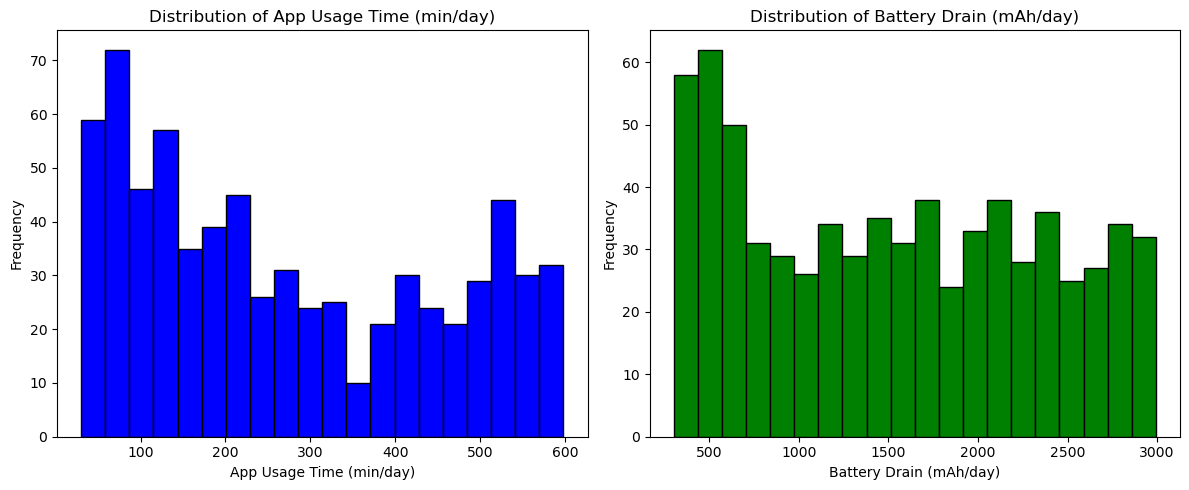

In [2]:
import matplotlib.pyplot as plt

# Plot histograms for App Usage Time and Battery Drain
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['App Usage Time (min/day)'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Battery Drain (mAh/day)'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Pairplot of Key Numeric Variables

c:\Users\loutz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loutz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loutz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loutz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

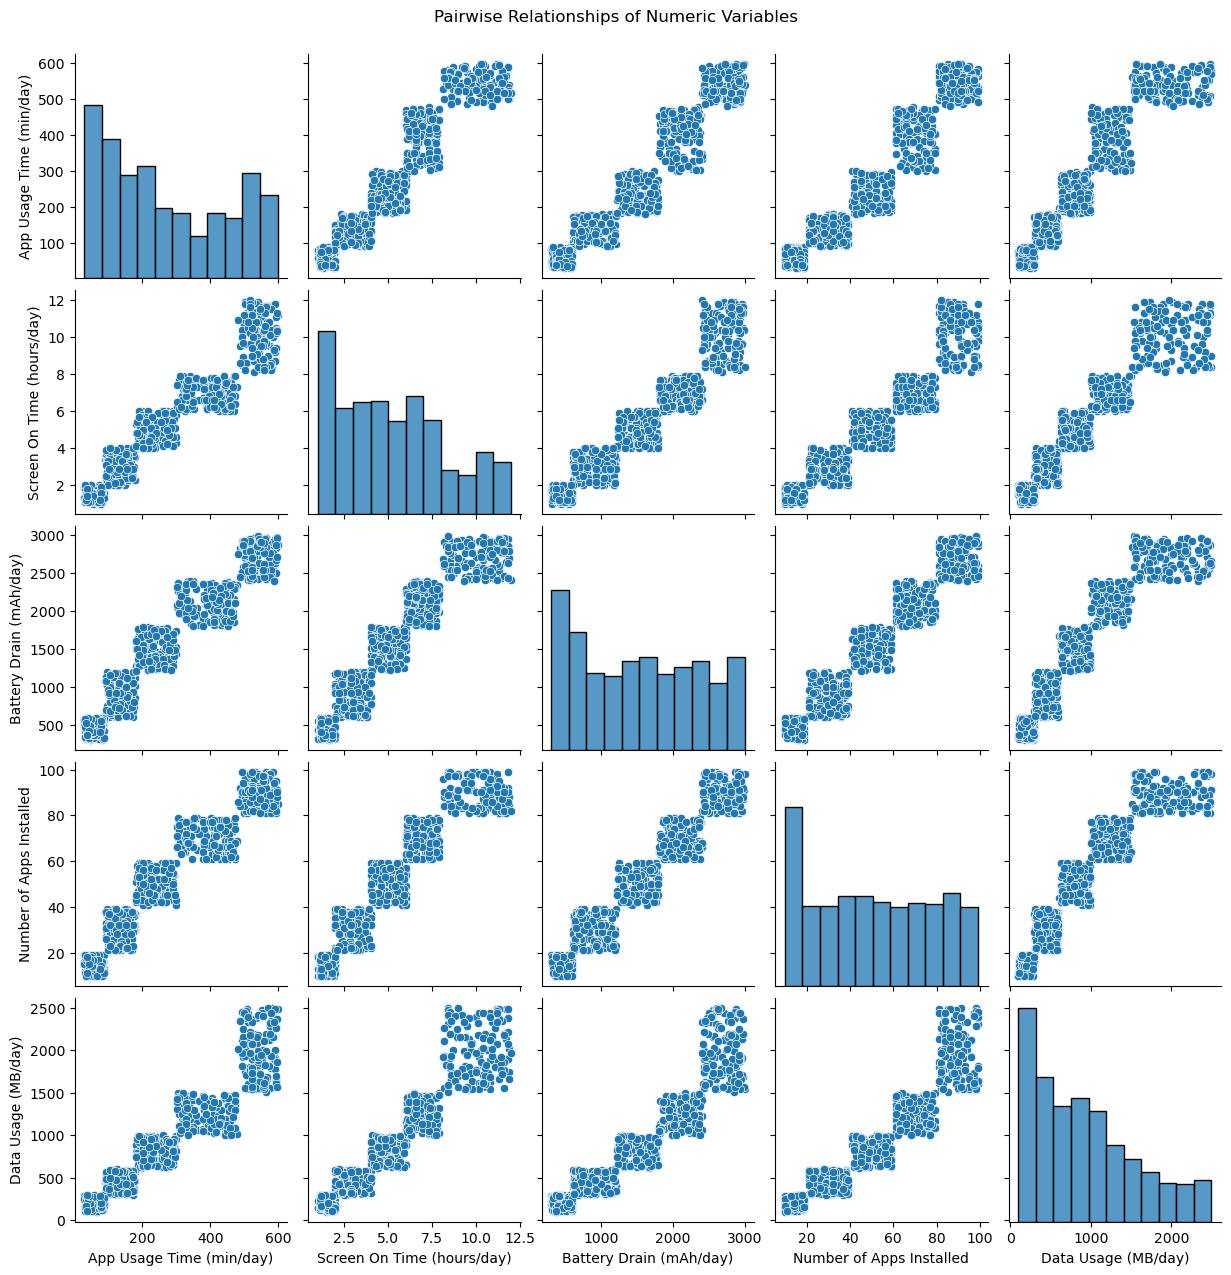

In [3]:
import seaborn as sns

# Selecting numeric columns
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                   'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                   'Data Usage (MB/day)']

# Plot pairplot for the selected numeric columns
sns.pairplot(data[numeric_columns])
plt.suptitle('Pairwise Relationships of Numeric Variables', y=1.02)
plt.show()


# Correlation Heatmap

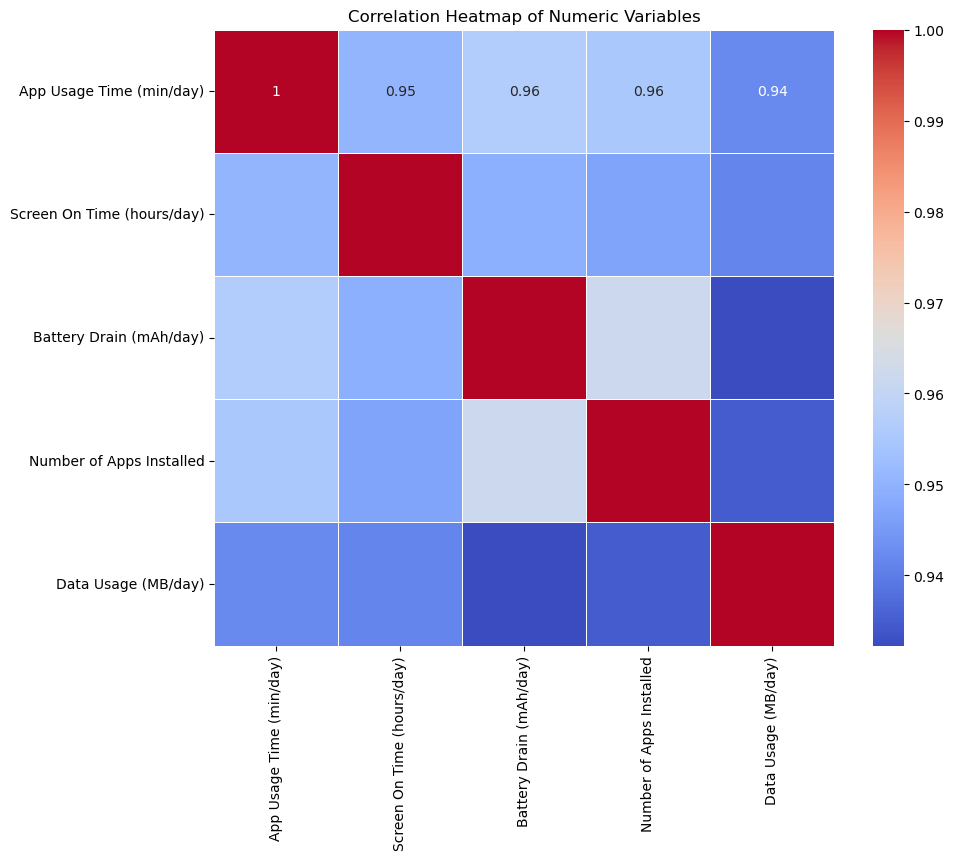

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


# Feature Importance for Battery Drain Prediction (Random Forest)

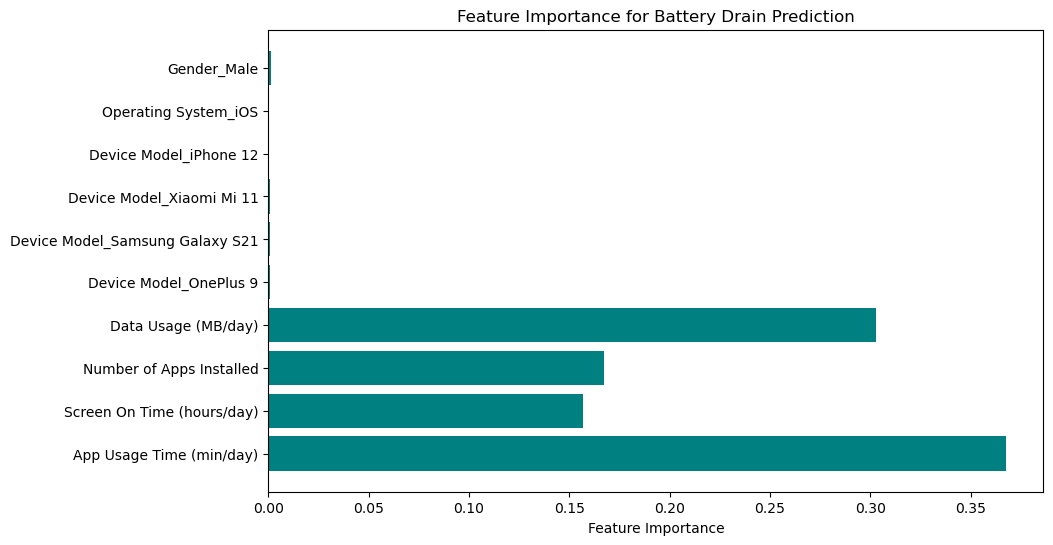

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Selecting features and target variable
X = data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
          'Number of Apps Installed', 'Data Usage (MB/day)', 
          'Device Model', 'Operating System', 'Gender']]
y = data['Battery Drain (mAh/day)']

# One-hot encoding categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument sparse_output
X_encoded = encoder.fit_transform(X[['Device Model', 'Operating System', 'Gender']])

# Concatenate the encoded features with the numeric ones
X_numeric = X[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
               'Number of Apps Installed', 'Data Usage (MB/day)']]
X_final = np.hstack([X_numeric, X_encoded])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
importance = rf_model.feature_importances_

# Combine numeric columns and one-hot encoded feature names
feature_names = list(X_numeric.columns) + list(encoder.get_feature_names_out(['Device Model', 'Operating System', 'Gender']))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Battery Drain Prediction')
plt.show()


# Actual vs. Predicted Scatter Plot for Battery Drain (Random Forest)

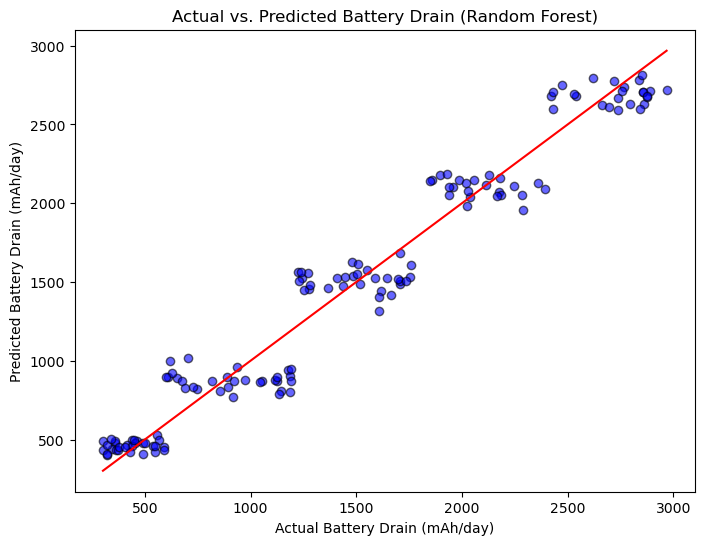

In [7]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolors='black', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing ideal prediction
plt.title('Actual vs. Predicted Battery Drain (Random Forest)')
plt.xlabel('Actual Battery Drain (mAh/day)')
plt.ylabel('Predicted Battery Drain (mAh/day)')
plt.show()


# Feature Importance for App Usage Time Prediction (Gradient Boosting)

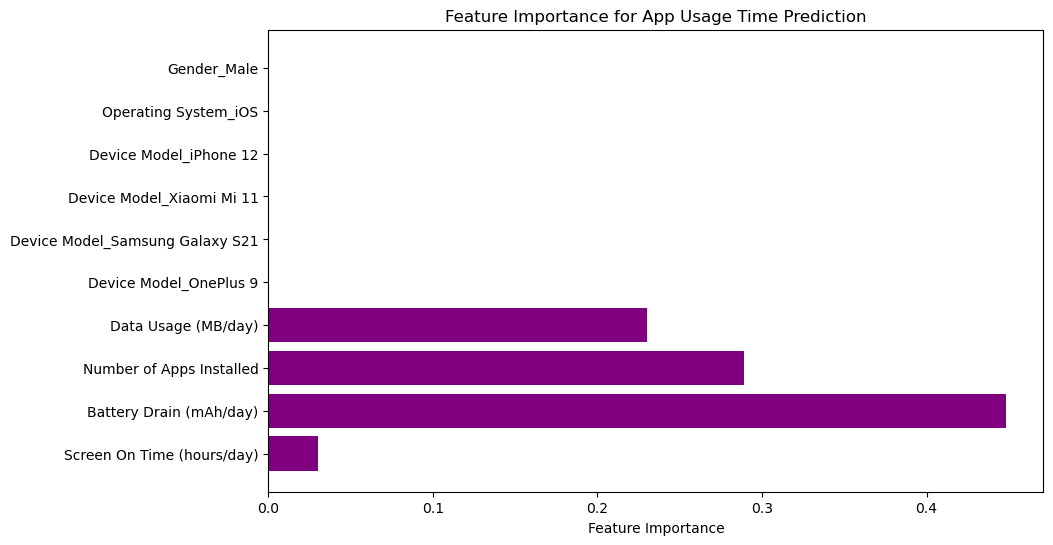

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Selecting features and target variable for App Usage Time prediction
X = data[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
          'Number of Apps Installed', 'Data Usage (MB/day)', 
          'Device Model', 'Operating System', 'Gender']]
y = data['App Usage Time (min/day)']

# One-hot encoding categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[['Device Model', 'Operating System', 'Gender']])

# Concatenate the encoded features with the numeric ones
X_numeric = X[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
               'Number of Apps Installed', 'Data Usage (MB/day)']]
X_final = np.hstack([X_numeric, X_encoded])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importance
gb_importance = gb_model.feature_importances_

# Combine numeric columns and one-hot encoded feature names
feature_names = list(X_numeric.columns) + list(encoder.get_feature_names_out(['Device Model', 'Operating System', 'Gender']))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, gb_importance, color='purple')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for App Usage Time Prediction')
plt.show()


# Actual vs. Predicted Scatter Plot for App Usage Time (Gradient Boosting)

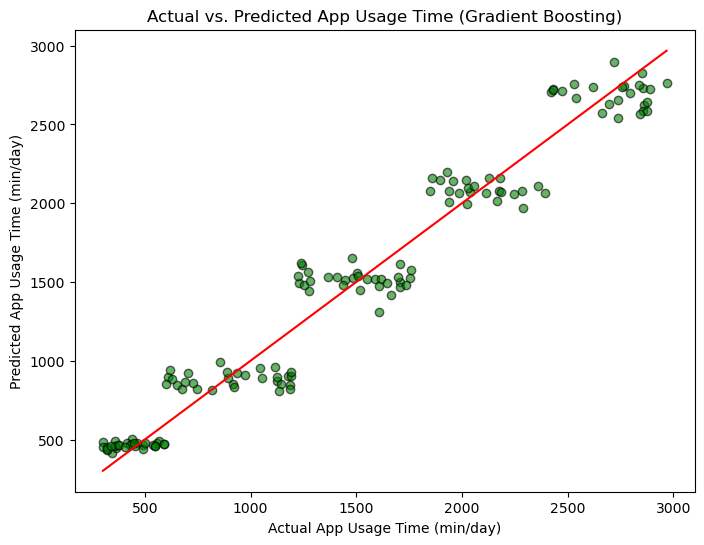

In [9]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='green', edgecolors='black', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing ideal prediction
plt.title('Actual vs. Predicted App Usage Time (Gradient Boosting)')
plt.xlabel('Actual App Usage Time (min/day)')
plt.ylabel('Predicted App Usage Time (min/day)')
plt.show()
